In [3]:
# Clustering Assignment - Iris Dataset Comparative Analysis

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_iris()
X = data.data
feature_names = data.feature_names

# Preprocessing techniques
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

# Clustering algorithms
clustering_algos = {
    'KMeans': lambda n: KMeans(n_clusters=n, random_state=42),
    'Agglomerative': lambda n: AgglomerativeClustering(n_clusters=n),
    'DBSCAN': lambda _: DBSCAN(eps=0.5, min_samples=5)
}

# Store results
results = []

# Try different scalers
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    for algo_name, algo_func in clustering_algos.items():
        for n_clusters in [2, 3, 4, 5]:  # DBSCAN doesn't use n_clusters
            try:
                if algo_name == 'DBSCAN' and n_clusters != 3:
                    continue  # Avoid looping multiple times unnecessarily for DBSCAN
                model = algo_func(n_clusters)
                cluster_labels = model.fit_predict(X_scaled)

                # Skip if only 1 cluster found
                if len(set(cluster_labels)) <= 1:
                    continue

                silhouette = silhouette_score(X_scaled, cluster_labels)
                ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
                db_score = davies_bouldin_score(X_scaled, cluster_labels)

                results.append({
                    'Scaler': scaler_name,
                    'Algorithm': algo_name,
                    'n_clusters': n_clusters,
                    'Silhouette Score': round(silhouette, 3),
                    'Calinski-Harabasz': round(ch_score, 3),
                    'Davies-Bouldin': round(db_score, 3)
                })
            except Exception as e:
                print(f"Error for {scaler_name} + {algo_name} ({n_clusters}): {e}")

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Save to CSV
df_results.to_csv("clustering_comparison_results.csv", index=False)

df_results

,Scaler,Algorithm,n_clusters,Silhouette Score,Calinski-Harabasz,Davies-Bouldin
0,StandardScaler,KMeans,2,0.582,251.349,0.593
1,StandardScaler,KMeans,3,0.480,157.360,0.789
2,StandardScaler,KMeans,4,0.385,206.681,0.870
3,StandardScaler,KMeans,5,0.345,202.636,0.944
4,StandardScaler,Agglomerative,2,0.577,240.246,0.592
5,StandardScaler,Agglomerative,3,0.447,222.719,0.803
6,StandardScaler,Agglomerative,4,0.401,201.251,0.979
7,StandardScaler,Agglomerative,5,0.331,192.681,0.974
8,StandardScaler,DBSCAN,3,0.357,84.510,7.124
9,MinMaxScaler,KMeans,2,0.630,354.366,0.486


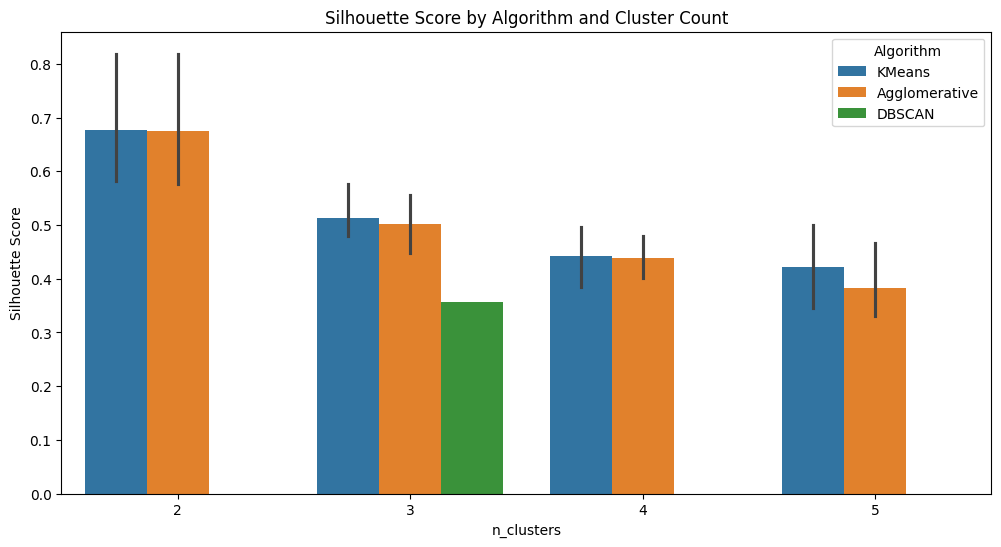

In [4]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x='n_clusters', y='Silhouette Score', hue='Algorithm')
plt.title('Silhouette Score by Algorithm and Cluster Count')
plt.show()